In [7]:
import numpy as np
import math
import cv2 as cv
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'original')

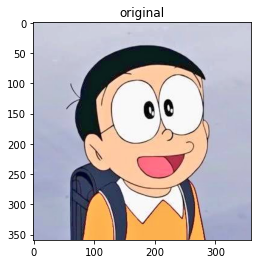

In [8]:
img = plt.imread("nobita.jpg")
plt.imshow(img)
plt.title("original")

Text(0.5, 1.0, 'gray scale')

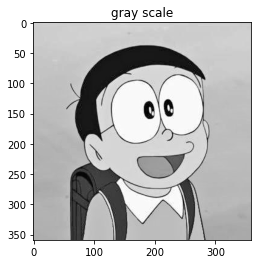

In [9]:
#converting image to grayscale
grayScale = cv.imread("nobita.jpg",0)
plt.imshow(grayScale,cmap="gray")
plt.title("gray scale")

Text(0.5, 1.0, 'guassian blured gray scale')

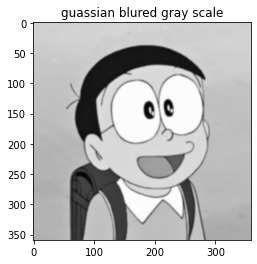

In [10]:
#image smoothing using guassian filter
#For this, convolution function can also be used by just changing the Kernel.

grayScale = cv.GaussianBlur(grayScale,(5,5),0)
plt.imshow(grayScale,cmap="gray")
plt.title("guassian blured gray scale")

In [11]:
#flip kernel horizontally
def flipKernelHorizontally(kernel,size):
    horizontalKernel = np.zeros((size,size),dtype=np.float64)
    temp=0
    for i in range(0,size):
        temp=0
        for j in range(size-1,-1,-1):
            horizontalKernel[i][temp]=kernel[i][j]
            temp=temp+1
    return horizontalKernel 

In [12]:
#flip kernel vertically
def flipKernelVertically(kernel,size):
    verticalKernel = np.zeros((size,size),dtype=np.float64)
    temp=0
    for x in range(size-1,-1,-1):
        for y in range(0,size):
            verticalKernel[temp][y]=kernel[x][y]
        temp=temp+1
    return verticalKernel

In [13]:
#convolution technique to find fx and fy (ignoring boundaries because in edge detection corners do not matter likely).
def findFxFy(img,kernel):
    convolutedImg = np.zeros((img.shape[0], img.shape[1]), dtype = np.float64)

    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1): 
            sum=0
            x = i - 1
            for k in range(0,3):
                y = j - 1
                for l in range(0,3):
                    sum = sum + (kernel[k][l] * img[x][y])
                    y = y + 1
                x = x + 1
            convolutedImg[i][j] = sum

    return convolutedImg

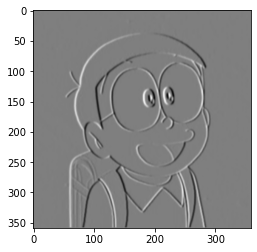

In [14]:
kernel=[
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]

kernel = flipKernelHorizontally(kernel,3) 
kernel = flipKernelVertically(kernel,3)

fx = np.zeros((grayScale.shape[0], grayScale.shape[1]), dtype = int)
fx=findFxFy(grayScale,kernel)

cv.imwrite("Fx.jpg",fx)
plt.imshow(fx,cmap="gray")

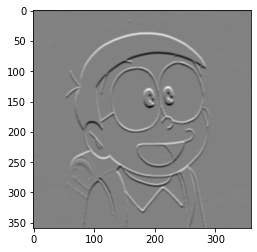

In [15]:
kernel=[
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
]
sum=0
kernel = flipKernelHorizontally(kernel,3) 
kernel = flipKernelVertically(kernel,3)

fy = np.zeros((grayScale.shape[0], grayScale.shape[1]), dtype = int)
fy=findFxFy(grayScale,kernel)

cv.imwrite("Fy.jpg",fy)
plt.imshow(fy,cmap="gray")

Text(0.5, 1.0, 'soble filtered image')

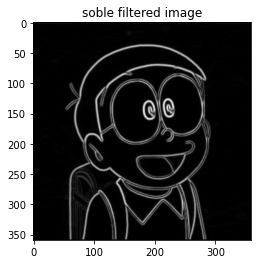

In [16]:
sobelImg = np.zeros((grayScale.shape[0], grayScale.shape[1]), dtype = int)
for i in range (0,grayScale.shape[0]):
    for j in range (0,grayScale.shape[1]):
        sobelImg[i][j] = math.sqrt((fx[i][j]**2)+(fy[i][j]**2))
        
cv.imwrite("Magnitude.jpg",sobelImg)
plt.imshow(sobelImg,cmap="gray")
plt.title("soble filtered image")


Text(0.5, 1.0, 'Direction image')

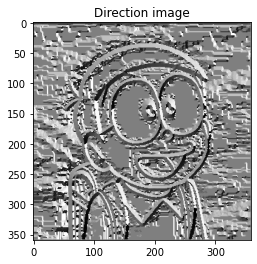

In [17]:
gradientDirection = np.arctan2(fy,fx)
gradientDirection = np.rad2deg(gradientDirection)
gradientDirection += 180

plt.imshow(gradientDirection,cmap="gray")
plt.title("Direction image")

Text(0.5, 1.0, 'Non-Maxima suppressed')

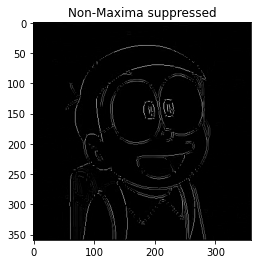

In [18]:
nonMaxima =  np.zeros((sobelImg.shape[0], sobelImg.shape[1]), dtype = int)

for i in range(1,sobelImg.shape[0]-1):
        for j in range(1,sobelImg.shape[1]-1):
            if (gradientDirection[i][j] >=0 and gradientDirection[i][j] < 22.5) or gradientDirection[i][j] > 337.5:
                temp1 = sobelImg[i][j+1]
                temp2 = sobelImg[i][j-1]
            elif gradientDirection[i][j] >=22.5 and gradientDirection[i][j] < 67.5:
                temp1 = sobelImg[i-1][j+1]
                temp2 = sobelImg[i+1][j-1] 
            elif gradientDirection[i][j] >=67.5 and gradientDirection[i][j] < 112.5:
                temp1 = sobelImg[i-1][j]
                temp2 = sobelImg[i+1][j]                
            elif gradientDirection[i][j] >=112.5 and gradientDirection[i][j] < 157.5:
                temp1 = sobelImg[i-1][j-1]
                temp2 = sobelImg[i+1][j+1]                
            elif gradientDirection[i][j] >=157.5 and gradientDirection[i][j] < 202.5:
                temp1 = sobelImg[i][j-1]
                temp2 = sobelImg[i][j+1]                
            elif gradientDirection[i][j] >=202.5 and gradientDirection[i][j] < 247.5:
                temp1 = sobelImg[i+1][j-1]
                temp2 = sobelImg[i-1][j+1]                
            elif gradientDirection[i][j] >=247.5 and gradientDirection[i][j] < 292.5:
                temp1 = sobelImg[i+1][j]
                temp2 = sobelImg[i-1][j]                
            elif gradientDirection[i][j] >=292.5 and gradientDirection[i][j] < 337.5:
                temp1 = sobelImg[i+1][j+1]
                temp2 = sobelImg[i-1][j-1]                    
            
            
            if(sobelImg[i][j]>temp1 and sobelImg[i][j]>temp2):
                nonMaxima[i][j] = sobelImg[i][j]
            else:
                nonMaxima[i][j] = 0

cv.imwrite("NMS.jpg",nonMaxima)
plt.imshow(nonMaxima,cmap="gray")               
plt.title("Non-Maxima suppressed")           

Text(0.5, 1.0, 'Double Thresholded Image')

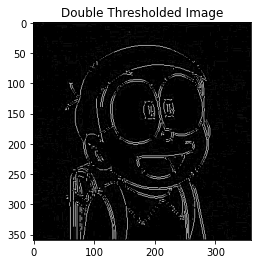

In [19]:
#There are 2 thresholding techniques to be applied.

#1 - Double thresholding
#2 - Hystersis thresholding

#harcode/set your thresholding values in such way that image give good result.

Hthresh = 42;
Lthresh = 2;

thresholdedImg =  np.zeros((nonMaxima.shape[0], nonMaxima.shape[1]), dtype = int)

for i in range(0,nonMaxima.shape[0]):
    for j in range(0,nonMaxima.shape[1]):
        if(nonMaxima[i][j]>=Hthresh):
            thresholdedImg[i][j]=255
        elif nonMaxima[i][j]<Lthresh:
            thresholdedImg[i][j]=0
        else:
            thresholdedImg[i][j]=25           #assign any garbage value here.

plt.imshow(thresholdedImg,cmap="gray") 
plt.title("Double Thresholded Image")


Text(0.5, 1.0, 'Hysteresis Thresholded Image')

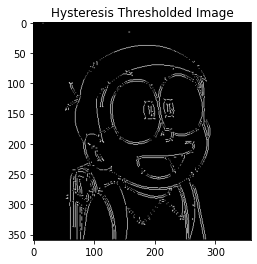

In [20]:
#Hysteresis thresholding => check for neighbours of "garbage value assigned" piexels i.e 25 valued, if you find its any strong neighnour, mark your garbage pixel strong too.   

HysteresisImg = np.zeros((nonMaxima.shape[0], nonMaxima.shape[1]), dtype = int)
for i in range(1,nonMaxima.shape[0]-1):
    for j in range(1,nonMaxima.shape[1]-1):
        if (thresholdedImg[i][j] == 25):
            if ((thresholdedImg[i+1, j-1] == 255) or (thresholdedImg[i+1, j] == 255) or (thresholdedImg[i+1, j+1] == 255) or (thresholdedImg[i, j-1] == 255) or (thresholdedImg[i, j+1] == 255) or (thresholdedImg[i-1, j-1] == 255) or (thresholdedImg[i-1, j] == 255) or (thresholdedImg[i-1, j+1] == 255)):
                HysteresisImg[i, j] = 255
            else:
                HysteresisImg[i, j] = 0
        else:
            HysteresisImg[i,j]=thresholdedImg[i][j]
cv.imwrite("Hysteresis.jpg",HysteresisImg)
plt.imshow(HysteresisImg,cmap="gray")
plt.title("Hysteresis Thresholded Image")